# Examples

In [1]:
import ivim
import numpy as np
import matplotlib.pyplot as plt

Examples coming soon...

### Protocol optimization
Cramer Rao-based optimization

In [2]:
D = 1e-3
f = 0.1
regime = ivim.models.BALLISTIC_REGIME
bmax = 800
fitK = False
K = 0
bthr = 200
Dstar = 20e-3
v = 2e-3
tau = 100e-3
seq = ivim.seq.sde.MONOPOLAR
system_constraints = {'Gmax':80e-3,'t180':10e-3,'risetime':1e-3}
res = ivim.optimize.crlb(D, f, regime, bmax=bmax, fitK=fitK, K=K, bthr=bthr, Dstar=Dstar, v=v, tau=tau, seq=seq, system_constraints=system_constraints)
print(res)

(array([  7.15028721, 240.83255025, 558.96126276, 792.84971279]), array([0.22450862, 0.22450862, 0.22450862, 0.22450862]), 0.01, 0.022)


TODO:
- fitK
- fixed a for diffusive

In [3]:
print(res)

(array([0.e+00, 2.e-03, 8.e+02]), array([0.36376243, 0.41610789, 0.22012968]))


## Simulations

### Langevin equation

Comparison of velocity autocorrelation function obtained from simulations and the theoretical one.

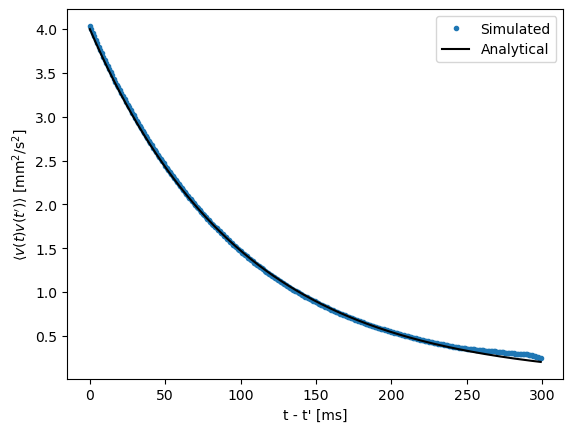

In [ ]:
sigma_v = 2e-3
tau = 100e-3
dt = 1e-3
m = 300
n = 10000

v = ivim.sim.langevin(sigma_v,tau,dt,m,n)

vacf_sim = np.zeros((m,3))
vacf_sim[0,:] = np.mean(np.var(v,axis=0),axis=0)
for i in range(1,m):
    vacf_sim[i,:] = np.mean(np.mean(v[:,:-i,:]*v[:,i:,:],axis=0),axis=0)

t = np.arange(m)*dt
vacf_an = sigma_v**2 * np.exp(-t/tau)
plt.plot(t*1e3,vacf_sim[:,0]*1e6,'.',label='Simulated')
plt.plot(t*1e3,vacf_an*1e6,'k-',label='Theoretical')
plt.xlabel("t - t' [ms]")
plt.ylabel(r"$\langle v(t)v(t') \rangle$ [mm$^2$/s$^2$]")
plt.legend();


Trajectories in a 1x1x1 mm3 cube.

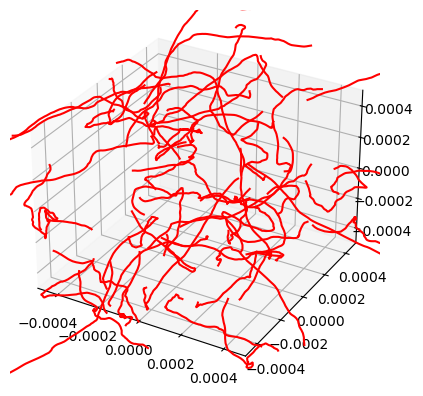

In [45]:
walkers = 50
r = 1e-3*(np.random.rand(walkers,3)-0.5)[:,np.newaxis,:] + np.cumsum(v[:walkers,:,:],axis=1)*dt

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
for i in range(walkers):
    ax.plot(r[i,:,0],r[i,:,1],r[i,:,2],'r')
ax.set_xlim([-0.5e-3,0.5e-3])
ax.set_ylim([-0.5e-3,0.5e-3])
ax.set_zlim([-0.5e-3,0.5e-3]);